## Lithofacies Clssification Using Machine Learning Algorithms from Well Log data


Here we are going to implement standard and comprehensive steps to find the best model and hyperparameters in order to predict lithfacies from a well log dataset. Following ML algorithms are going to be used.

1. Decision Trees Classifier
2. Random Forest Classifier
3. Support Vector Machine Classifier
4. XgBoost Classifier

***The Dataset***

This dataset is from Hugoton and Panoma Fields in North America. It contains log records from 9 different wells. Each well consists of 7 differenet features (diffrenret logging method). They are: <br>

1. __GR__: Measures natural radioactivity of a formation<br>
2. __ILD_log10__: Measures resistivty of a formation<br>
3. __PE__: photoelectric effect log<br>
4. __DeltaPHI__: Measures neutron porosity.<br>
5. __PNHIND__: Average of neutron and density log.<br>
6. __NM_M__: Nonmarine-marine indicator<br>
7. __RELPOS__: Relative position<br>

It contains nine different types of facies or lithologies which are:<br>
1. (SS) Nonmarine sandstone<br>
2. (CSiS) Nonmarine coarse siltstone<br>
3. (FSiS) Nonmarine fine siltstone<br>
4. (SiSH) Marine siltstone and shale<br>
5. (MS) Mudstone (type of limestone)<br>
6. (WS) Wackestone (type of limestone)<br>
7. (D) Dolomite<br>
8. (PS) Packstone-grainstone (type of limestone)<br>
9. (BS) Phylloid-algal bafflestone (type of limestone)<br>

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# dataframe
df = pd.read_csv(r'c:\Users\sanju\Desktop\AI-ML in Oil and Gas industry\Practical_ML_Tutorial_Facies_examp-main\facies_vectors.csv')
df.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


**1. EDA (Exploratory Data Analysis)**

***1.1 Data Visualization***

In [13]:
# statistical summury of the whole dataset by each column
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [17]:
# data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [26]:
# Percentage and No. of NaN values in each columns 
for col_name in df.columns:
    
    if df[col_name].isna().sum() == 0:
        print ('Column {0} has 0 NaN values or 0 % NaN values'.format(col_name))
    else:
        print ( 
            'Column {0} has {1} NaN values or {2} percent Nan values'.format( 
            col_name, df[col_name].isna().sum(), round(df[col_name].isna().mean()*100 ,2)
            )
    )

Column Facies has 0 NaN values or 0 % NaN values
Column Formation has 0 NaN values or 0 % NaN values
Column Well Name has 0 NaN values or 0 % NaN values
Column Depth has 0 NaN values or 0 % NaN values
Column GR has 0 NaN values or 0 % NaN values
Column ILD_log10 has 0 NaN values or 0 % NaN values
Column DeltaPHI has 0 NaN values or 0 % NaN values
Column PHIND has 0 NaN values or 0 % NaN values
Column PE has 917 NaN values or 22.1 percent Nan values
Column NM_M has 0 NaN values or 0 % NaN values
Column RELPOS has 0 NaN values or 0 % NaN values


In [3]:
# Total number of different facies
df[['Facies']].value_counts()

Facies
2         940
3         780
8         686
6         582
5         296
4         271
1         268
9         185
7         141
Name: count, dtype: int64

In [4]:
# differet types of well
df[['Well Name']].value_counts()

Well Name      
CROSS H CATTLE     501
SHRIMPLIN          471
ALEXANDER D        466
NEWBY              463
LUKE G U           461
SHANKLE            449
KIMZEY A           439
NOLAN              415
CHURCHMAN BIBLE    404
Recruit F9          80
Name: count, dtype: int64

**1. Shrimplin well**

In [5]:
# SHRIMPLIN Well log values
cond = df['Well Name'] == 'SHRIMPLIN'
df_SHRIMPLIN = df[cond]
df_SHRIMPLIN.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [6]:
df_SHRIMPLIN.shape

(471, 11)

In [7]:
# checking for any non-null values in SHRIMPLIN well
df_SHRIMPLIN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 470
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     471 non-null    int64  
 1   Formation  471 non-null    object 
 2   Well Name  471 non-null    object 
 3   Depth      471 non-null    float64
 4   GR         471 non-null    float64
 5   ILD_log10  471 non-null    float64
 6   DeltaPHI   471 non-null    float64
 7   PHIND      471 non-null    float64
 8   PE         471 non-null    float64
 9   NM_M       471 non-null    int64  
 10  RELPOS     471 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 44.2+ KB


In [8]:
df_SHRIMPLIN['GR'].isnull().sum() # no null values 

0

In [9]:
# summary of the well data
df_SHRIMPLIN.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,4.384289,2910.501062,69.408896,0.659679,7.708493,12.173705,4.219958,1.488323,0.514482
std,2.207070,68.055644,37.299536,0.232894,4.279453,5.317152,0.902823,0.500395,0.289757
min,2.000000,2793.000000,13.280000,0.297000,-4.300000,1.590000,2.700000,1.000000,0.010000
25%,2.500000,2851.750000,46.895000,0.486000,4.300000,8.065000,3.400000,1.000000,0.261000
50%,3.000000,2910.500000,69.480000,0.580000,7.300000,12.170000,4.000000,1.000000,0.513000
75%,6.000000,2969.250000,85.995000,0.827500,11.150000,15.127500,5.000000,2.000000,0.765000
max,9.000000,3028.000000,361.150000,1.480000,18.500000,37.470000,6.300000,2.000000,1.000000


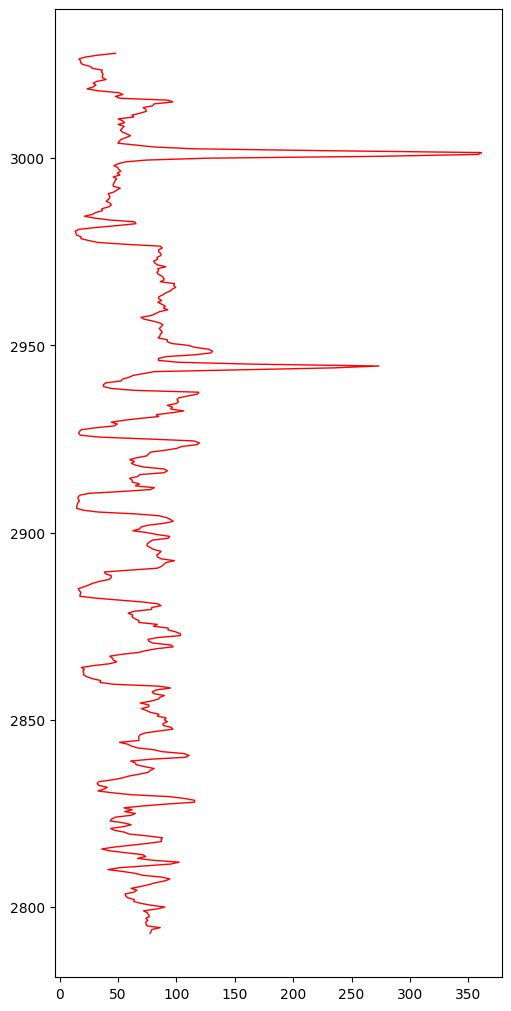

In [10]:
plt.figure(figsize = (5,10), constrained_layout = True)
plt.plot(df_SHRIMPLIN['GR'], df_SHRIMPLIN['Depth'], 
        linestyle = 'solid', 
        color = 'red',
        linewidth = 1) 
#plt.tight_layout()